In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from sklearn import decomposition # for PCA
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

In [3]:
df = datasets.load_iris() # Load the dataset


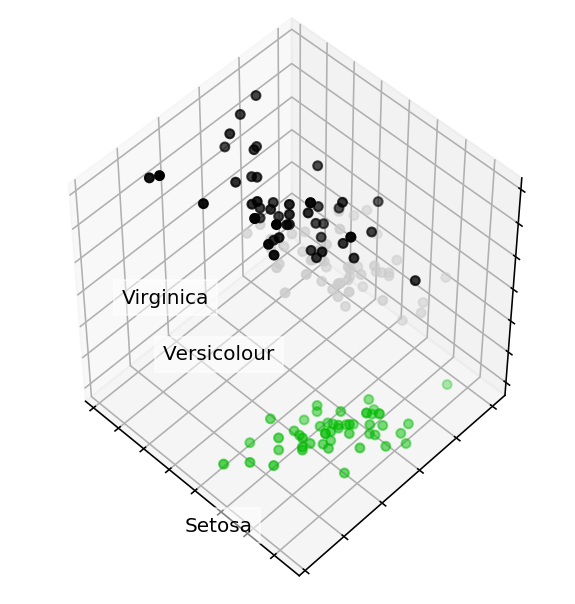

In [16]:
X = df.data
Y = df.target
fig = plt.figure(1,figsize=(4,4))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134) # Create a 3D plot

plt.cla()
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[Y == label, 0].mean(),
              X[Y == label, 1].mean() + 1.5,
              X[Y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    
    
    
# Change the order of labels, so that they match
y_clr = np.choose(Y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_clr, 
           cmap=plt.cm.nipy_spectral)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([]);


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3, 
                                                    stratify=Y, 
                                                    random_state=42)
# divide data into train and test
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, 
                                                preds.argmax(axis=1))))


Accuracy: 0.88889


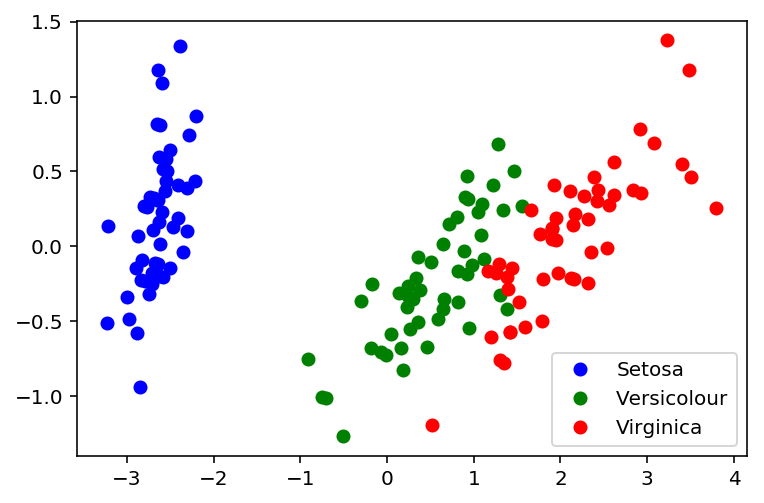

In [27]:
pca = decomposition.PCA(n_components=3) # Keep the number of axes as three
pca
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

# Plotting the results of PCA
plt.plot(X_pca[Y == 0, 0], X_pca[Y == 0, 1], 'bo', label='Setosa')
plt.plot(X_pca[Y == 1, 0], X_pca[Y == 1, 1], 'go', label='Versicolour')
plt.plot(X_pca[Y == 2, 0], X_pca[Y == 2, 1], 'ro', label='Virginica')
plt.legend(loc=0);

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=.3, 
                                                    stratify=Y, 
                                                    random_state=42)

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, 
                                                preds.argmax(axis=1))))

# Increase in accuray after performing PCA

Accuracy: 0.91111


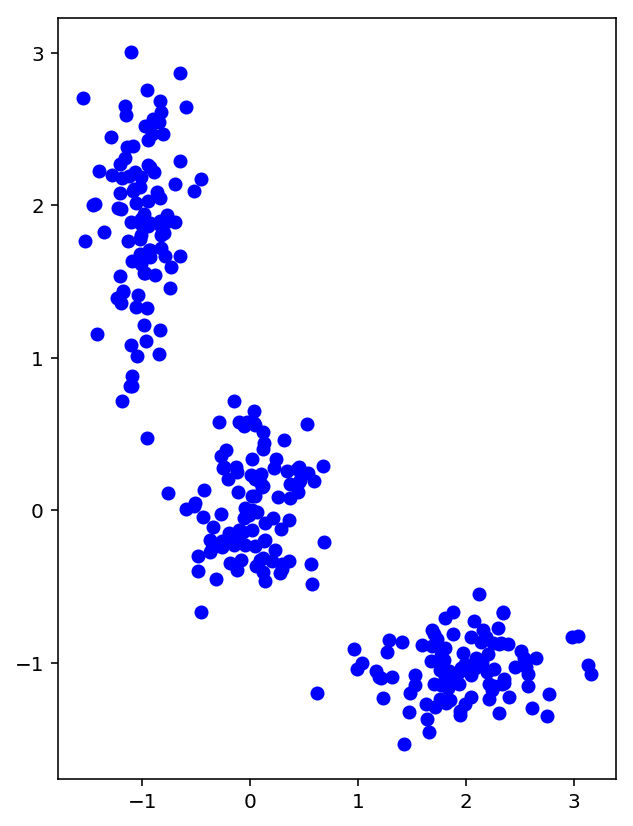

In [31]:
# Apply k_Means for a random dataset
X = np.zeros((300,2))
np.random.seed(seed=0) # Produce same number everytime

X[:100, 0] = np.random.normal(loc=0.0, scale=.3, size=100)  #The NumPy random normal function enables to create a NumPy array that contains normally distributed data.
X[:100, 1] = np.random.normal(loc=0.0, scale=.3, size=100)

X[100:200, 0] = np.random.normal(loc=2.0, scale=.5, size=100)
X[100:200, 1] = np.random.normal(loc=-1.0, scale=.2, size=100)

X[200:300, 0] = np.random.normal(loc=-1.0, scale=.2, size=100)
X[200:300, 1] = np.random.normal(loc=2.0, scale=.5, size=100)

plt.figure(figsize=(5, 7))
plt.plot(X[:, 0], X[:, 1], 'bo');


In [32]:
from scipy.spatial.distance import cdist

# Randomly allocate the 3 centroids 
np.random.seed(seed=42)
centroids = np.random.normal(loc=0.0, scale=1., size=6)
centroids = centroids.reshape((3, 2))

cent_history = []
cent_history.append(centroids)

for i in range(3):
    # Calculating the distance from a point to a centroid
    distances = cdist(X, centroids)
    # Checking what's the closest centroid for the point
    labels = distances.argmin(axis=1)
    
    #distance of each point
    centroids = centroids.copy()
    centroids[0, :] = np.mean(X[labels == 0, :], axis=0)
    centroids[1, :] = np.mean(X[labels == 1, :], axis=0)
    centroids[2, :] = np.mean(X[labels == 2, :], axis=0)
    
    cent_history.append(centroids)

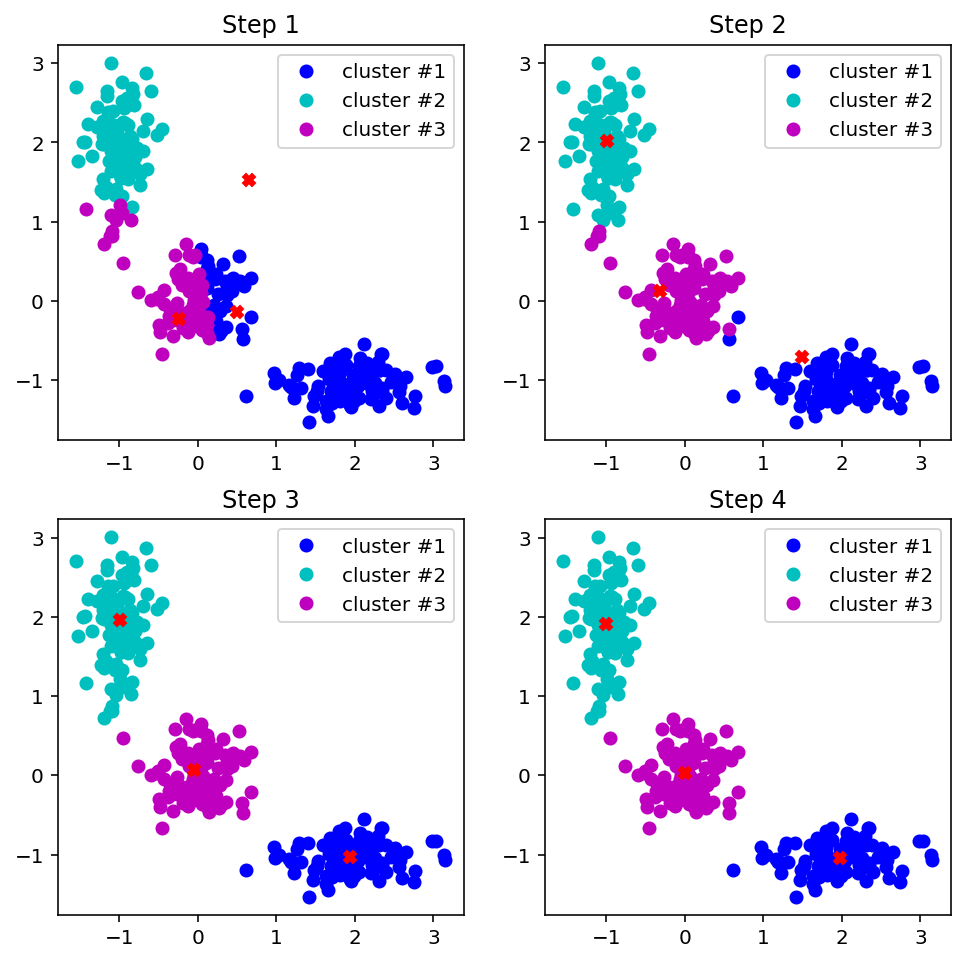

In [33]:
plt.figure(figsize=(8, 8))
for i in range(4):
    distances = cdist(X, cent_history[i])
    labels = distances.argmin(axis=1)
    
    plt.subplot(2, 2, i + 1)
    plt.plot(X[labels == 0, 0], X[labels == 0, 1], 'bo', label='cluster #1')
    plt.plot(X[labels == 1, 0], X[labels == 1, 1], 'co', label='cluster #2')
    plt.plot(X[labels == 2, 0], X[labels == 2, 1], 'mo', label='cluster #3')
    plt.plot(cent_history[i][:, 0], cent_history[i][:, 1], 'rX')
    plt.legend(loc=0)
    plt.title('Step {:}'.format(i + 1));

In [34]:
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

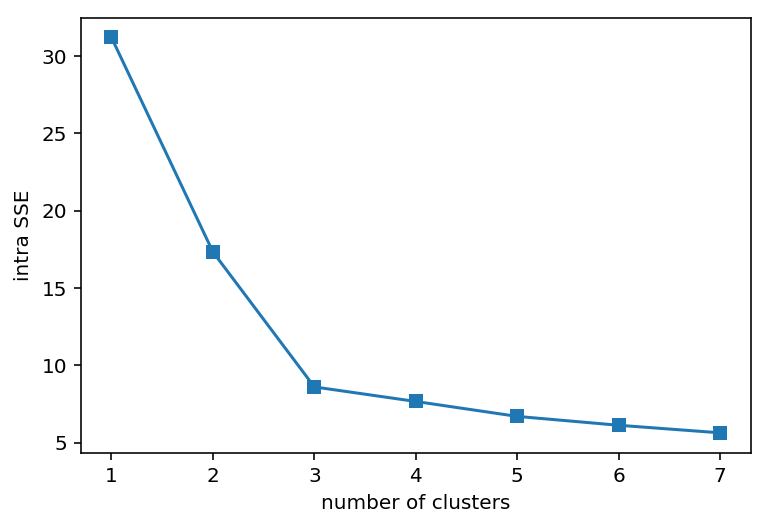

In [35]:
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('number of clusters')
plt.ylabel('intra SSE');

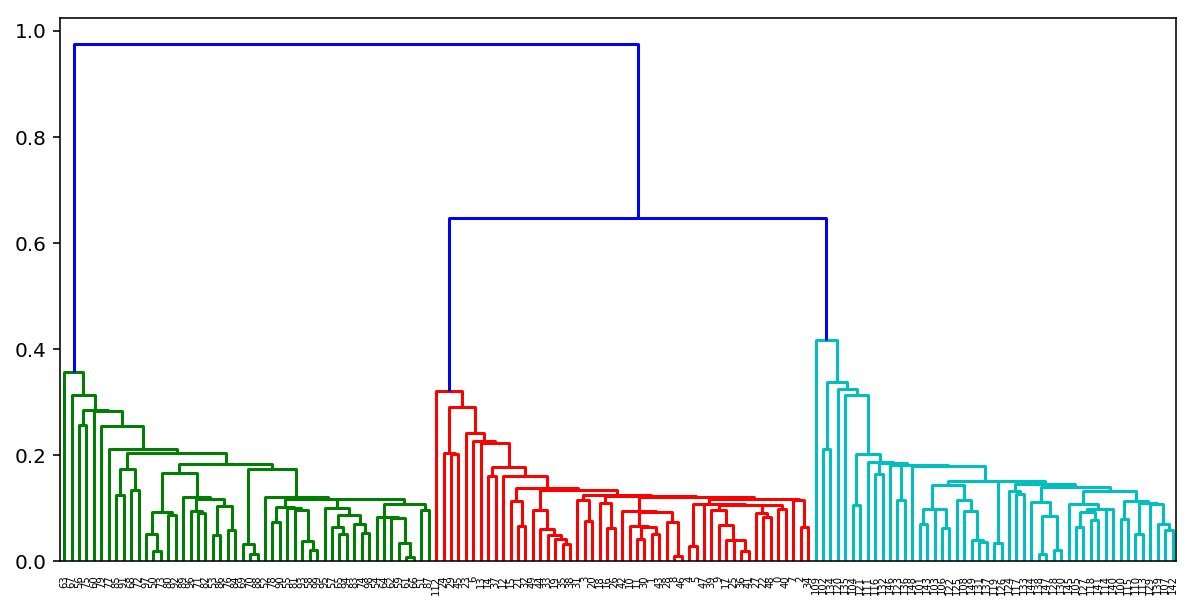

In [36]:
# Heirarchial clustering 
# Agglomerative clustering

from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)


# pdist will calculate the upper triangle of the pairwise distance matrix
distance_mat = pdist(X) 
# linkage — is an implementation if agglomerative algorithm
Z = hierarchy.linkage(distance_mat, 'single')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)